In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [4]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

In [5]:
df.drop('Person ID', axis=1, inplace=True)

In [6]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [7]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [8]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [10]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())


['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


In [11]:
#EDA

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

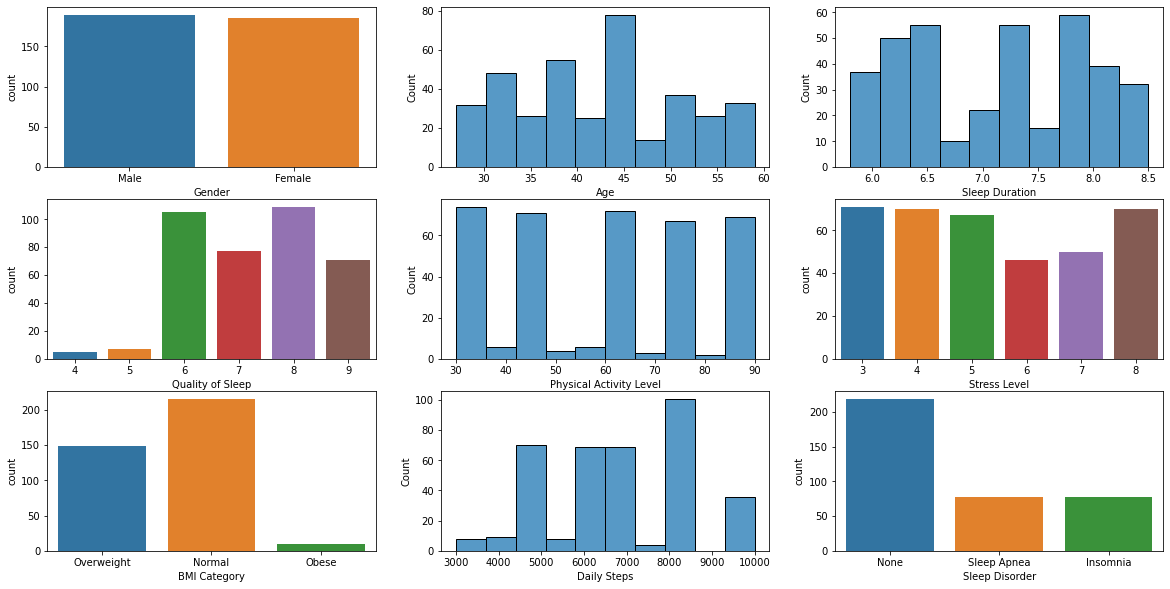

In [12]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])

Text(0.5, 1.0, 'Countplot of Sleep Disorders by Gender')

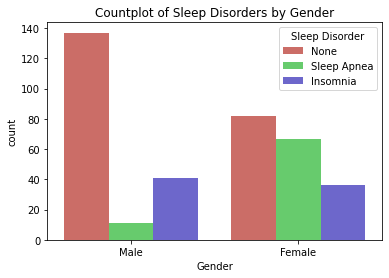

In [13]:
#Gender count plot
sns.countplot(x='Gender', data=df, palette='hls', hue='Sleep Disorder'); plt.title('Countplot of Sleep Disorders by Gender')

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

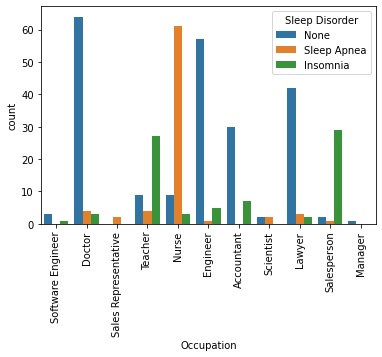

In [14]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Text(0.5, 1.0, 'Countplot of Sleep Disorders by BMI Category')

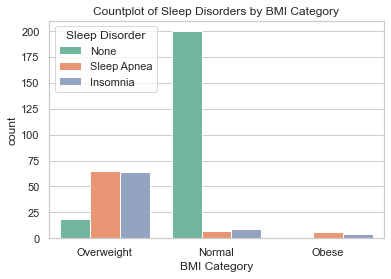

In [15]:
import seaborn as sns; sns.set(style="whitegrid"); sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df, palette='Set2'); plt.title('Countplot of Sleep Disorders by BMI Category')

In [16]:
#Data Preprocessing Part 2
#Label Encoding for categorical variables

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


<AxesSubplot:>

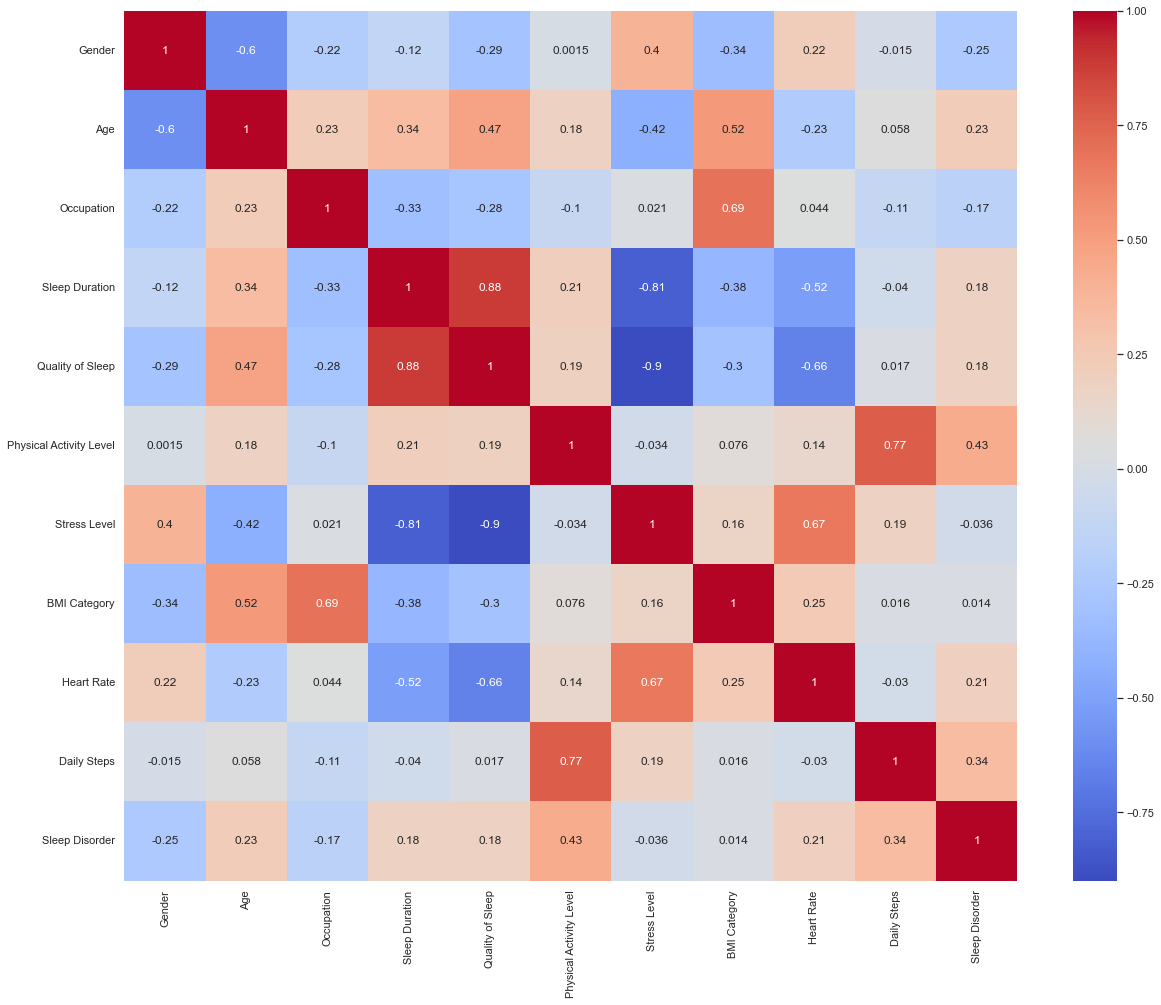

In [19]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split; X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder', axis=1), df['Sleep Disorder'], test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9331103678929766


In [24]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2])

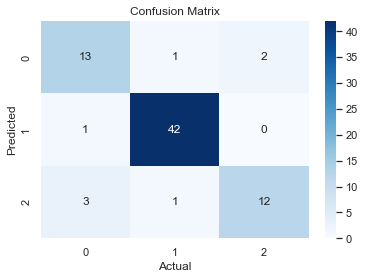

In [25]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

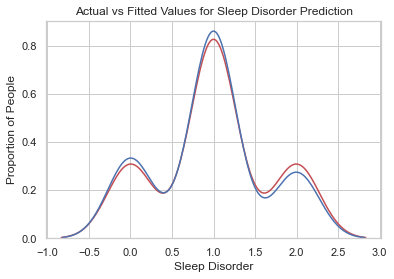

In [26]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))


              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9331103678929766


In [31]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2])

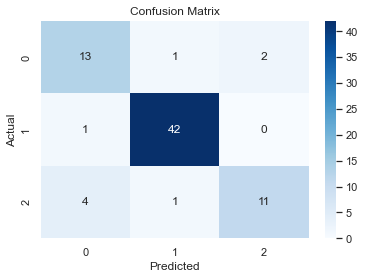

In [32]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

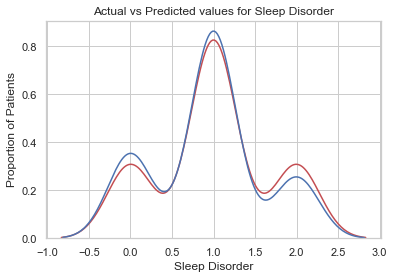

In [33]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

In [34]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

